In [41]:
import os
import time
import pandas as pd
import pkg_resources
from fragt2vec.utility import draw_multiple_mol, draw_mol_by_smiles

import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

from IPython.display import SVG

In [2]:
data_dir = pkg_resources.resource_filename('fragt2vec', 'demo_data')
data_dir

'd:\\github\\fragtandem2vecx\\fragt2vec\\demo_data'

In [3]:
frag_info = pd.read_csv(os.path.join(data_dir, 'article', 'molecular_fragment_info.csv'), index_col=0)
frag_info.head(2)

,n_fragment,MW,SLogP,nRot,nN,nS,nO,nX,nBondsD,nBondsT,naRing,nARing
fragment,,,,,,,,,,,,
[NH]1[NH]O[NH]O1,3,77.022526,-0.0187,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
[NH]1[PH][PH][NH]P2[NH]P1[NH]2,3,185.954293,2.4706,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


(array([  18.,   46.,  152.,  532., 1141., 1798., 1581., 1565., 1208.,
         950.,  934.,  848.,  707.,  607.,  593.,  624.,  480.,  465.,
         325.,  239.,  172.,  111.,   84.,   51.,   31.,   24.,   19.,
           7.,    2.,    4.]),
 array([ 16.03130013,  34.73763298,  53.44396583,  72.15029869,
         90.85663154, 109.56296439, 128.26929724, 146.9756301 ,
        165.68196295, 184.3882958 , 203.09462865, 221.80096151,
        240.50729436, 259.21362721, 277.91996006, 296.62629292,
        315.33262577, 334.03895862, 352.74529147, 371.45162432,
        390.15795718, 408.86429003, 427.57062288, 446.27695573,
        464.98328859, 483.68962144, 502.39595429, 521.10228714,
        539.80862   , 558.51495285, 577.2212857 ]),
 <a list of 30 Patch objects>)

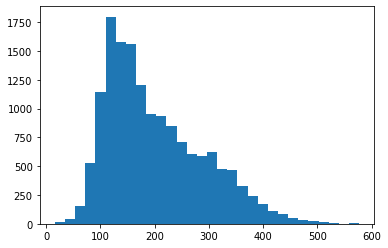

In [6]:
plt.hist(frag_info['MW'], bins=30)

In [21]:
keep_inx = (frag_info['n_fragment'] >= 20) & (frag_info['MW'] <= 200) & (frag_info['nN'] <= 3) & (frag_info['nO'] <= 3) & \
           (frag_info['nS'] <= 3) & (frag_info['nBondsD'] <= 3) & (frag_info['nARing'] <= 2) & (frag_info['naRing'] <= 1)

In [22]:
frag_info_keep = frag_info.loc[keep_inx, :].copy()
frag_info_keep.shape

(3036, 12)

In [23]:
frag_info_keep.describe()

,n_fragment,MW,SLogP,nRot,nN,nS,nO,nX,nBondsD,nBondsT,naRing,nARing
count,3.036000e+03,3036.000000,3036.000000,3036.0,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000,3036.000000
mean,5.671922e+05,120.782687,1.202452,0.0,0.987154,0.320817,0.563900,0.011858,0.915020,0.028656,0.063241,1.247694
std,1.111865e+07,33.569396,1.207200,0.0,0.974214,0.595846,0.772382,0.114188,0.884811,0.213627,0.243436,0.545684
min,2.000000e+01,16.031300,-1.522900,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.100000e+01,99.023786,0.321600,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,1.140000e+02,116.040819,1.066900,0.0,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
75%,7.762500e+02,140.137637,1.909600,0.0,2.000000,1.000000,1.000000,0.000000,2.000000,0.000000,0.000000,2.000000
max,4.132086e+08,199.947476,5.461400,0.0,3.000000,3.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000


In [24]:
frag_info_replace = frag_info.loc[~keep_inx, :].copy()
print(frag_info_replace.shape)
frag_info_replace.head(2)

(12283, 12)


,n_fragment,MW,SLogP,nRot,nN,nS,nO,nX,nBondsD,nBondsT,naRing,nARing
fragment,,,,,,,,,,,,
[NH]1[NH]O[NH]O1,3,77.022526,-0.0187,0.0,3.0,0.0,2.0,0.0,0.0,0.0,1.0,0.0
[NH]1[PH][PH][NH]P2[NH]P1[NH]2,3,185.954293,2.4706,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0


(array([4484., 3154., 1384.,  619.,  404.,  233.,  241.,  191.,  112.,
         118.,  100.,   76.,  100.,   64.,   49.,   52.,   45.,   23.,
          30.,   36.,   25.,   28.,   35.,   10.,   31.,   25.,   13.,
          20.,   11.,   16.]),
 array([  0.        ,   6.66666667,  13.33333333,  20.        ,
         26.66666667,  33.33333333,  40.        ,  46.66666667,
         53.33333333,  60.        ,  66.66666667,  73.33333333,
         80.        ,  86.66666667,  93.33333333, 100.        ,
        106.66666667, 113.33333333, 120.        , 126.66666667,
        133.33333333, 140.        , 146.66666667, 153.33333333,
        160.        , 166.66666667, 173.33333333, 180.        ,
        186.66666667, 193.33333333, 200.        ]),
 <a list of 30 Patch objects>)

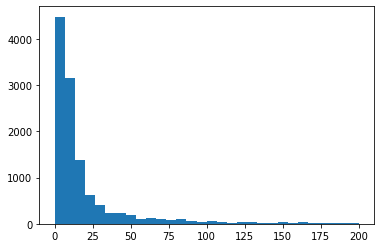

In [29]:
plt.hist(frag_info_replace['n_fragment'], bins=30, range=[0, 200])

In [44]:
frag_info['keep'] = 0
frag_info.loc[keep_inx, 'keep'] = 1
frag_info.loc[frag_info['n_fragment'] >= 10000, 'keep'] = 1
frag_info.to_csv('frag_info_marked.csv')

In [58]:
selected_frag_smiles = [
    'C1OC2C3C4CC5CC6C7CC8CC4C2C82C7C1C6C532',  # big nARing
    'C1CCC23CC4C5CC(CC4(CC1)O2)OCC5CO3', # big nARing
    'C1=CC2=CC(=C1)CCCNCCNCCC1=CC2=CC=C1', # big naRing
    
    'C1#CC=CC#CC#CC=CC#CC#CC=CC#C1',  # big nBondsD
    'C1=CCOC2=CC=C(C=C2)CCCNCCNC1',  # big MW
    'C1=CCCCCCCC2=CC(=CC=C2)NCCC=CCCC1',  # big MW
    
    'C1SSSCSSS1',  # big nS
    'C1=CN2CNCC3=NN(C=C3)CNCC1=N2',  # big nN
    'C1COCOOCOCOOCOCCO1',  # big nO
]

In [59]:
mol_frag_id = [str(i) for i in list(range(len(selected_frag_smiles)))]

In [60]:
svg = draw_multiple_mol(smiles_list=selected_frag_smiles, mols_per_row=3, legends=mol_frag_id, 
                        file_path='./chapter3_figure/weird_mol_frag.svg')

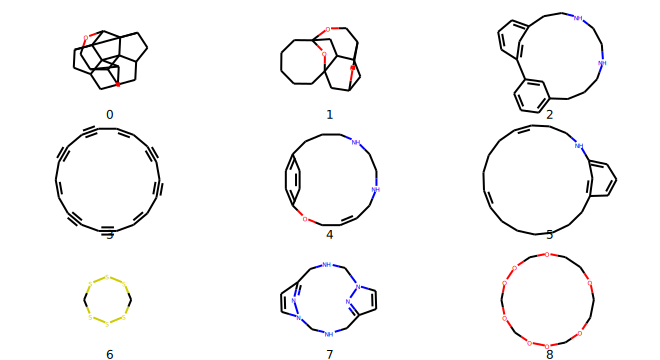

In [61]:
SVG(svg)

In [62]:
frag_info.loc[selected_frag_smiles, :].to_csv('selected_frag_smiles_info.csv')

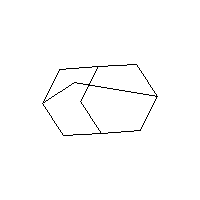

In [63]:
draw_mol_by_smiles("C1C2CC3CC1CC(C2)C3")

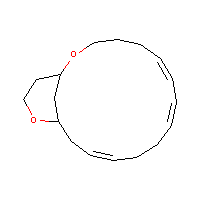

In [64]:
draw_mol_by_smiles('C1=CCCC=CCC2CC(CCO2)OCCCC=C1')